# TASK 2

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(R'C:\Users\Sanya srivastava\Desktop\Data project\train.csv')

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df.dropna(subset=["Embarked"],inplace=True)
df["Cabin"] = df["Cabin"].fillna("Unknown")
df["Age"] = df["Age"].fillna(df["Age"].mean())

C:\Users\Sanya srivastava\AppData\Local\Temp\ipykernel_2264\3217958860.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Age"] = df["Age"].fillna(df["Age"].mean())


In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

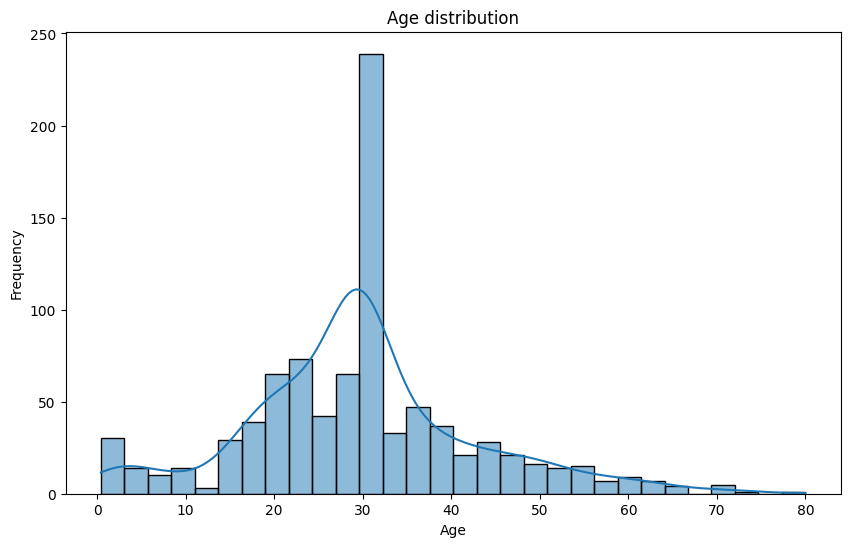

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df["Age"],kde=True)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\Sanya srivastava\AppData\Local\Temp\ipykernel_2264\1769156418.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Survived", loc="upper right")


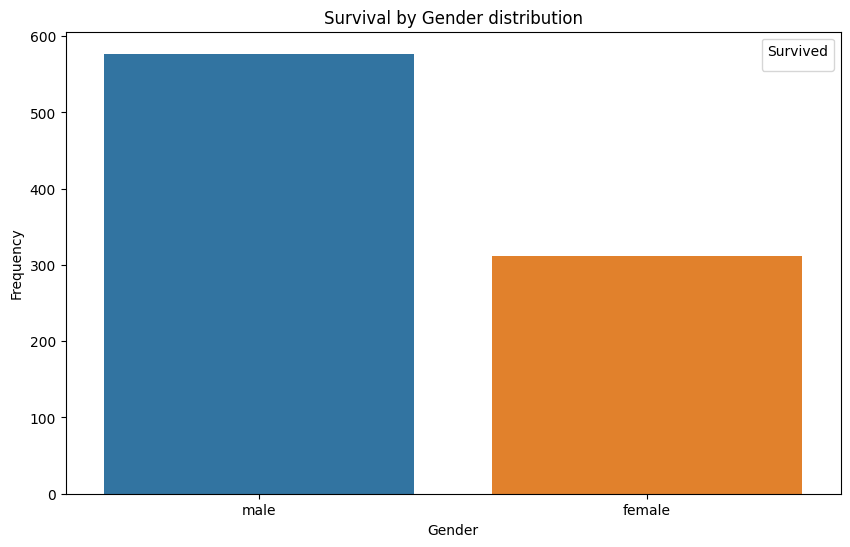

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Sex", hue="Sex")
plt.title("Survival by Gender distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.legend(title="Survived", loc="upper right")
plt.show()

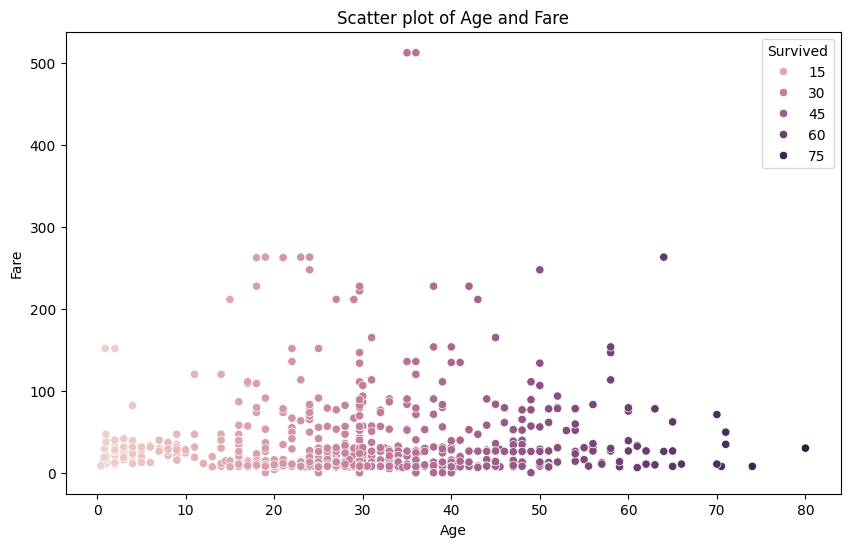

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Age",y="Fare", hue="Age")
plt.title("Scatter plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()

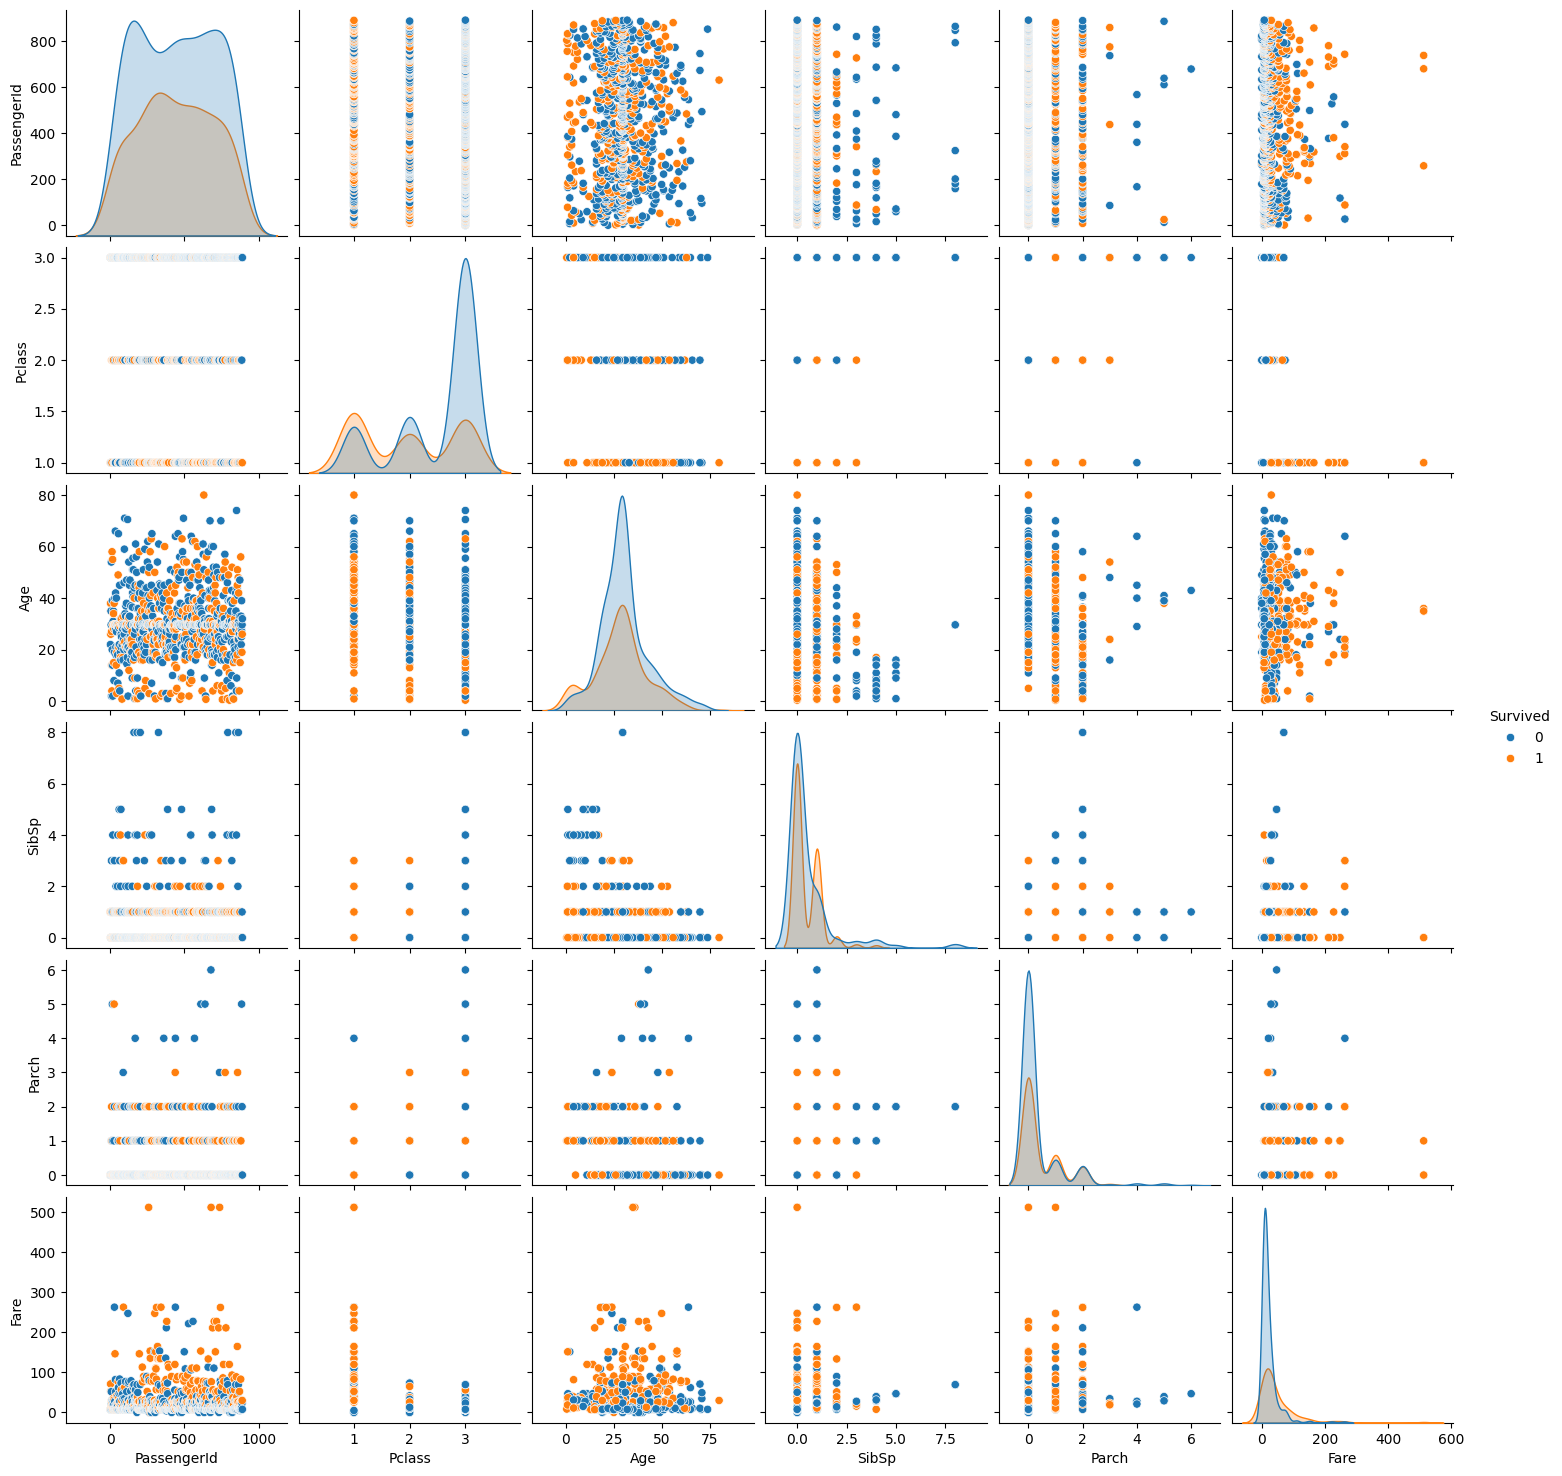

In [36]:
sns.pairplot(df,hue='Survived')
plt.show()

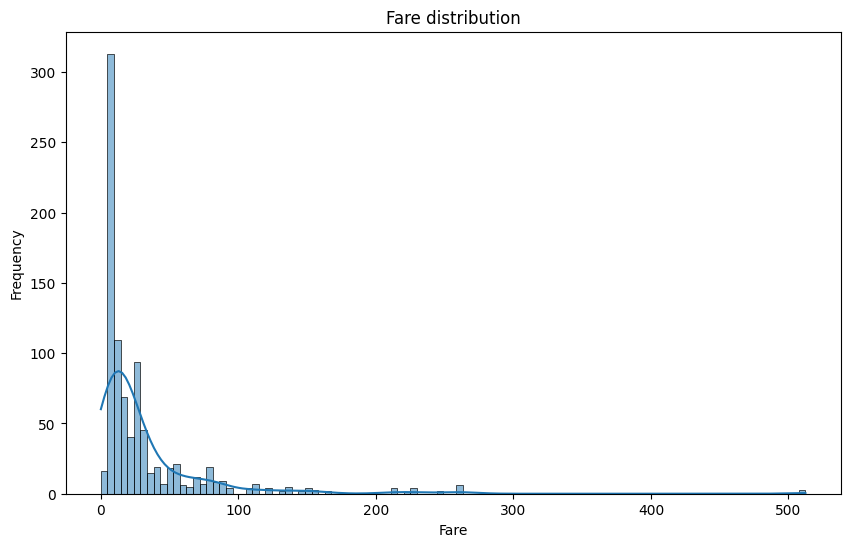

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df["Fare"],kde=True)
plt.title("Fare distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

Survival Rate by Sex:
Sex
female    74.038462
male      18.890815
Name: Survived, dtype: float64


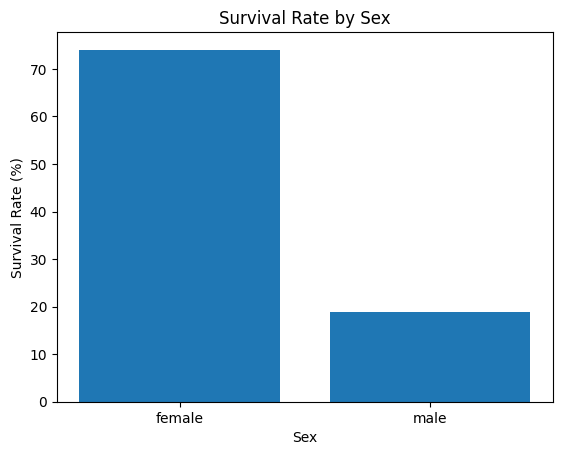

In [38]:
sex_survived = df.groupby('Sex')['Survived'].mean()*100
print(f"Survival Rate by Sex:\n{sex_survived}")
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

Survival Rate by Pclass:
Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64


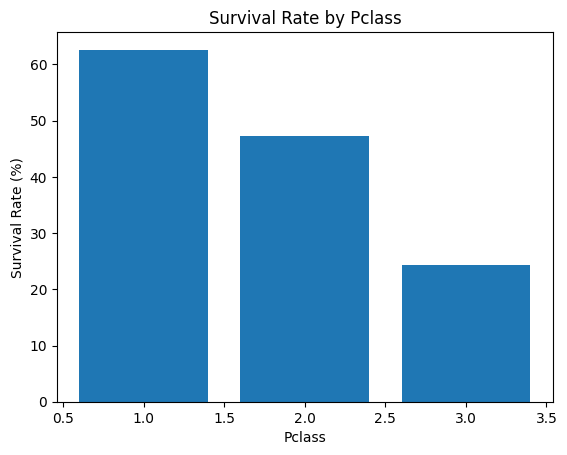

In [39]:
pclass_survived = df.groupby('Pclass')['Survived'].mean() * 100
print(f"Survival Rate by Pclass:\n{pclass_survived}")
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

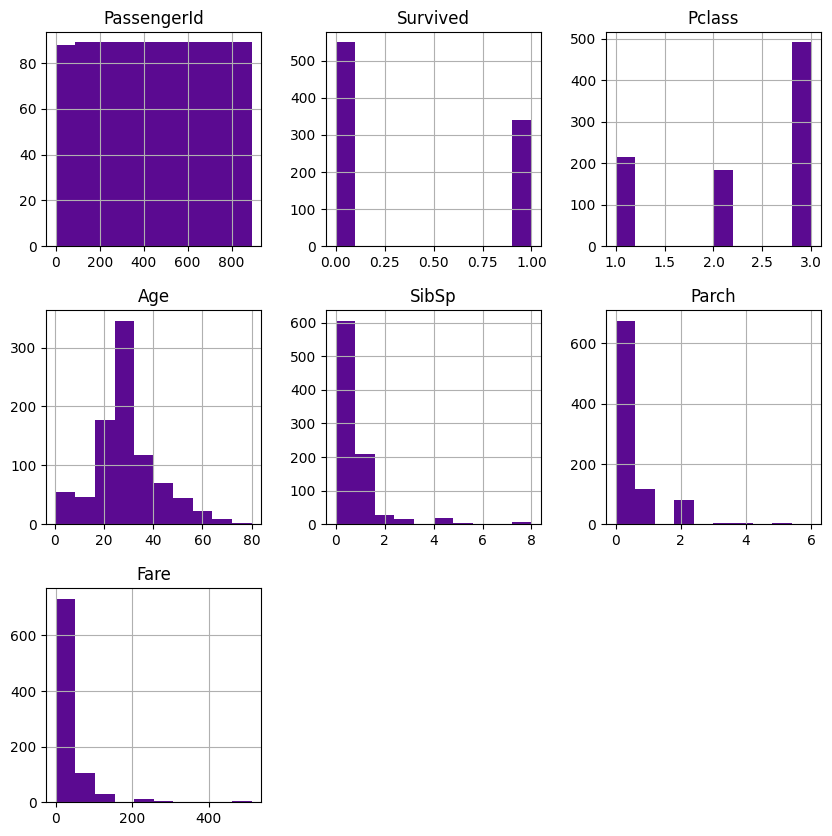

In [40]:
df.hist(figsize=(10,10),color='#5B0A91')
plt.show()